<a href="https://colab.research.google.com/github/arruenicol/colab/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300,6900,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,5,-74
1,Mesa de comedor,Muebles,192300,8400,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6,-76
2,Juego de mesa,Juguetes,209600,15900,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10,-76
3,Microondas,Electrodomésticos,757500,41000,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3,-77
4,Silla de oficina,Muebles,335200,20200,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6,-76


#1. Análisis de facturación



In [ ]:
# Ingreso total de cada tienda
ingreso_tienda_1 = tienda["Precio"].sum()
ingreso_tienda_2 = tienda2["Precio"].sum()
ingreso_tienda_3 = tienda3["Precio"].sum()
ingreso_tienda_4 = tienda4["Precio"].sum()

print(f"El ingreso total de la tienda 1 es: ${ingreso_tienda_1}")
print(f"El ingreso total de la tienda 2 es: ${ingreso_tienda_2}")
print(f"El ingreso total de la tienda 3 es: ${ingreso_tienda_3}")
print(f"El ingreso total de la tienda 4 es: ${ingreso_tienda_4}")

El ingreso total de la tienda 1 es: $1150880400.0
El ingreso total de la tienda 2 es: $1116343500.0
El ingreso total de la tienda 3 es: $1098019600.0
El ingreso total de la tienda 4 es: $1038375700.0


In [ ]:
# Dataframe de los ingresos
ingresos_totales = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [
        ingreso_tienda_1,
        ingreso_tienda_2,
        ingreso_tienda_3,
        ingreso_tienda_4
    ]
})

pd.set_option('display.float_format', '{:.0f}'.format)

print(ingresos_totales)

     Tienda  Ingreso Total
0  Tienda 1     1150880400
1  Tienda 2     1116343500
2  Tienda 3     1098019600
3  Tienda 4     1038375700


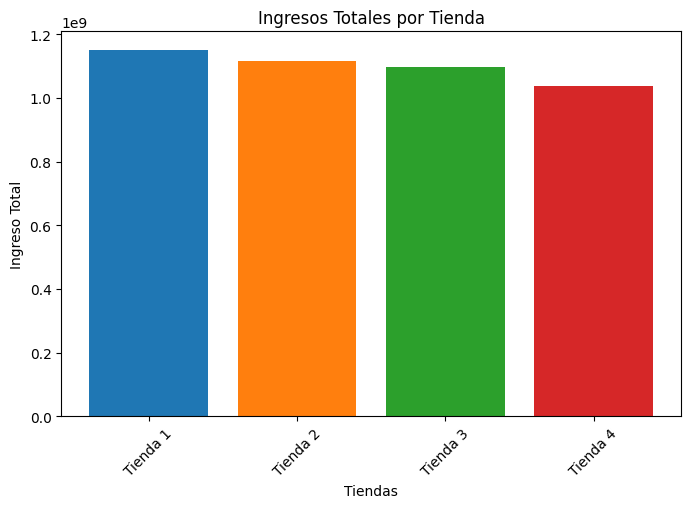

In [ ]:
#Gráfica comparativa
plt.figure(figsize=(8,5))

plt.bar(
    ingresos_totales["Tienda"],
    ingresos_totales["Ingreso Total"],
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
)

plt.xlabel("Tiendas")
plt.ylabel("Ingreso Total")
plt.title("Ingresos Totales por Tienda")
plt.xticks(rotation=45)

plt.show()


# 2. Ventas por categoría

In [ ]:
# 2. Análisis de ventas por categoría

# Obtener datos de cada tienda
categorias_tienda_1 = tienda["Categoría del Producto"].value_counts()
categorias_tienda_2 = tienda2["Categoría del Producto"].value_counts()
categorias_tienda_3 = tienda3["Categoría del Producto"].value_counts()
categorias_tienda_4 = tienda4["Categoría del Producto"].value_counts()

# Crear DataFrame comparativo con categorías como filas y tiendas como columnas
resumen_categorias = pd.DataFrame({
    'Tienda 1': categorias_tienda_1,
    'Tienda 2': categorias_tienda_2,
    'Tienda 3': categorias_tienda_3,
    'Tienda 4': categorias_tienda_4
}).fillna(0).astype(int)

print("\n=== CANTIDAD DE PRODUCTOS VENDIDOS POR CATEGORÍA ===\n")
print(resumen_categorias)
print()


=== CANTIDAD DE PRODUCTOS VENDIDOS POR CATEGORÍA ===

                         Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480



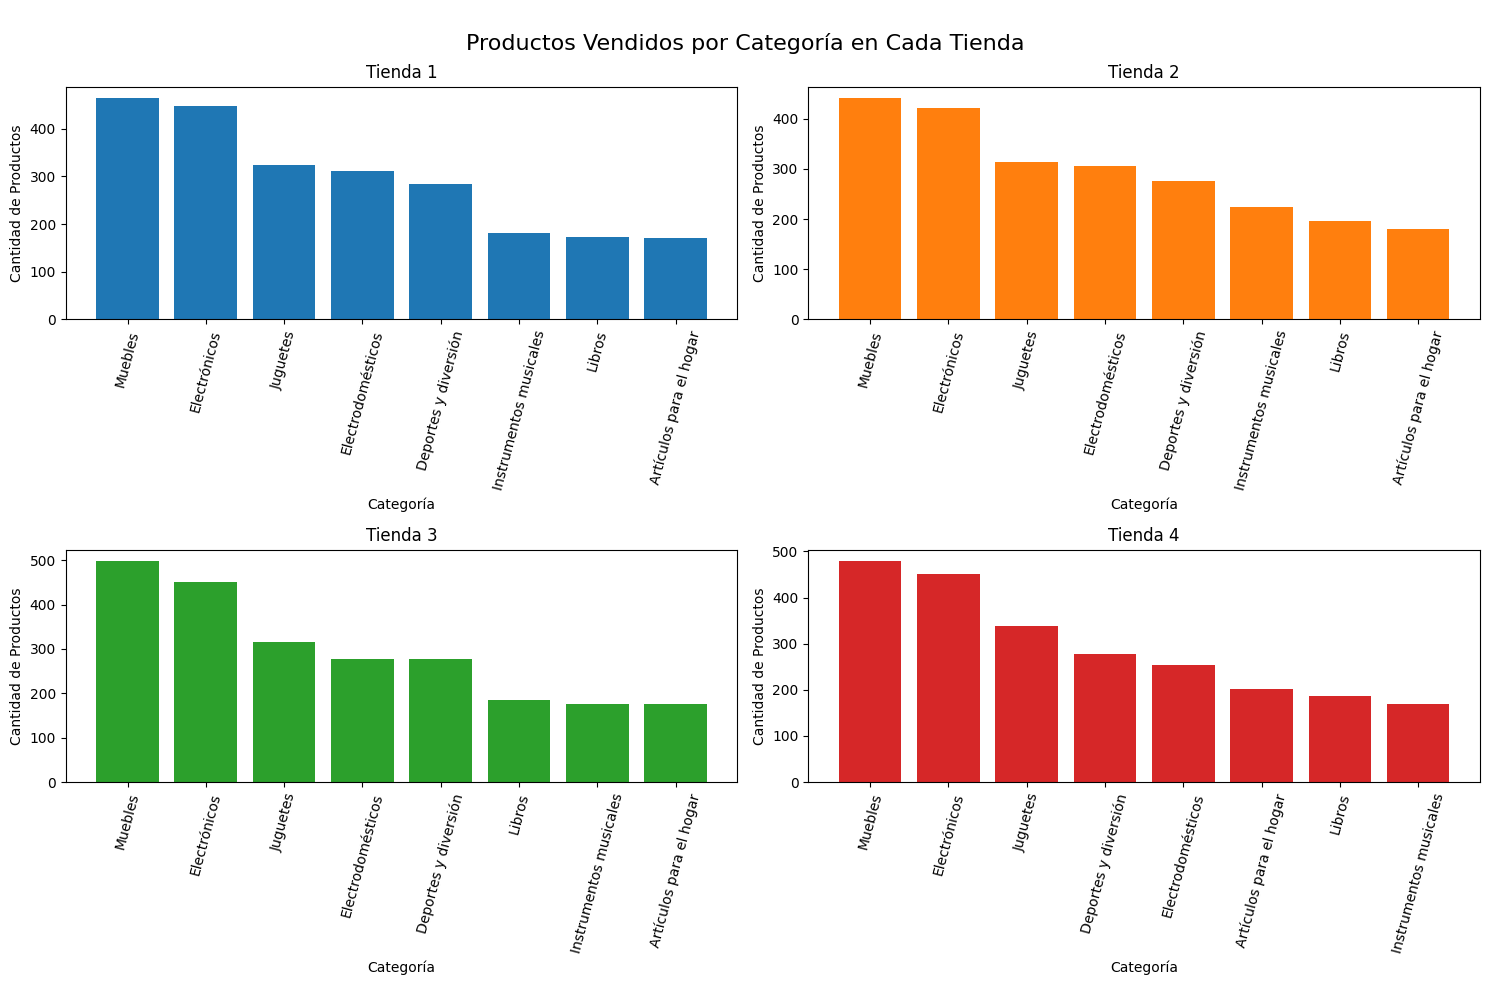


=== CATEGORÍA MÁS POPULAR POR TIENDA ===
Tienda 1: Muebles (465 productos)
Tienda 2: Muebles (442 productos)
Tienda 3: Muebles (499 productos)
Tienda 4: Muebles (480 productos)


In [ ]:

# Categorías más vendidas por tienda
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('\nProductos Vendidos por Categoría en Cada Tienda', fontsize=16)

# Tienda 1
axes[0, 0].bar(categorias_tienda_1.index, categorias_tienda_1.values, color='#1f77b4')
axes[0, 0].set_title('Tienda 1')
axes[0, 0].set_xlabel('Categoría')
axes[0, 0].set_ylabel('Cantidad de Productos')
axes[0, 0].tick_params(axis='x', rotation=75)

# Tienda 2
axes[0, 1].bar(categorias_tienda_2.index, categorias_tienda_2.values, color='#ff7f0e')
axes[0, 1].set_title('Tienda 2')
axes[0, 1].set_xlabel('Categoría')
axes[0, 1].set_ylabel('Cantidad de Productos')
axes[0, 1].tick_params(axis='x', rotation=75)

# Tienda 3
axes[1, 0].bar(categorias_tienda_3.index, categorias_tienda_3.values, color='#2ca02c')
axes[1, 0].set_title('Tienda 3')
axes[1, 0].set_xlabel('Categoría')
axes[1, 0].set_ylabel('Cantidad de Productos')
axes[1, 0].tick_params(axis='x', rotation=75)

# Tienda 4
axes[1, 1].bar(categorias_tienda_4.index, categorias_tienda_4.values, color='#d62728')
axes[1, 1].set_title('Tienda 4')
axes[1, 1].set_xlabel('Categoría')
axes[1, 1].set_ylabel('Cantidad de Productos')
axes[1, 1].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

# Categoría más popular de cada tienda
print("\n=== CATEGORÍA MÁS POPULAR POR TIENDA ===")
print(f"Tienda 1: {categorias_tienda_1.index[0]} ({categorias_tienda_1.iloc[0]} productos)")
print(f"Tienda 2: {categorias_tienda_2.index[0]} ({categorias_tienda_2.iloc[0]} productos)")
print(f"Tienda 3: {categorias_tienda_3.index[0]} ({categorias_tienda_3.iloc[0]} productos)")
print(f"Tienda 4: {categorias_tienda_4.index[0]} ({categorias_tienda_4.iloc[0]} productos)")

# 3. Calificación promedio de la tienda


In [ ]:
# 3. Análisis de calificaciones promedio

# Calcular calificación promedio de cada tienda
calificacion_tienda_1 = tienda["Calificación"].mean()
calificacion_tienda_2 = tienda2["Calificación"].mean()
calificacion_tienda_3 = tienda3["Calificación"].mean()
calificacion_tienda_4 = tienda4["Calificación"].mean()

# Crear DataFrame con las calificaciones promedio
calificaciones_promedio = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación Promedio": [
        calificacion_tienda_1,
        calificacion_tienda_2,
        calificacion_tienda_3,
        calificacion_tienda_4
    ]
})

print("=== CALIFICACIÓN PROMEDIO POR TIENDA ===\n")
pd.set_option('display.float_format', '{:.2f}'.format)
print(calificaciones_promedio)
print()


=== CALIFICACIÓN PROMEDIO POR TIENDA ===

     Tienda  Calificación Promedio
0  Tienda 1                   3.98
1  Tienda 2                   4.04
2  Tienda 3                   4.05
3  Tienda 4                   4.00



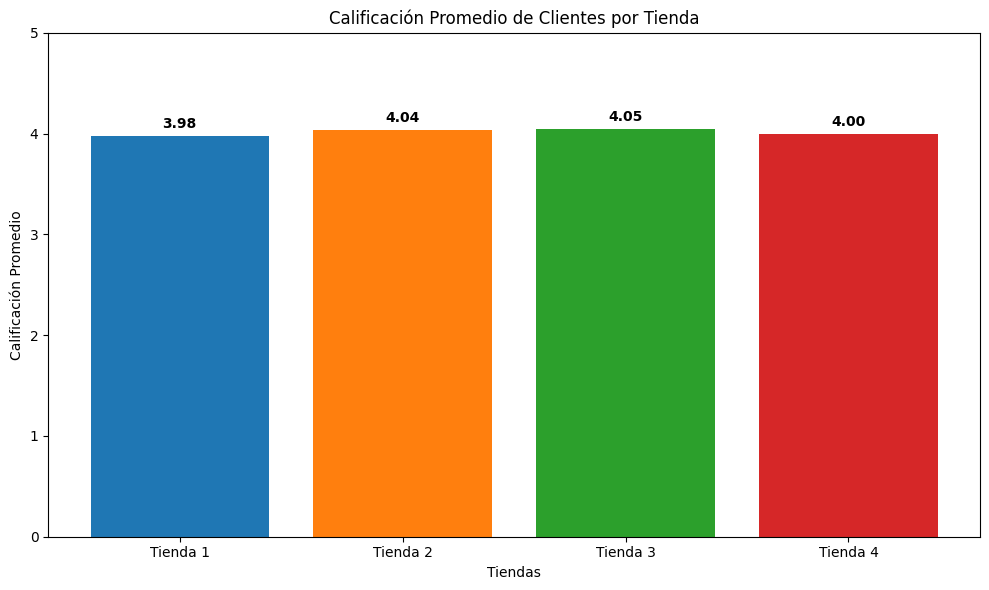

In [ ]:

# Gráfico de barras con las calificaciones promedio
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = plt.bar(
    calificaciones_promedio["Tienda"],
    calificaciones_promedio["Calificación Promedio"],
    color=colors
)

plt.xlabel("Tiendas")
plt.ylabel("Calificación Promedio")
plt.title("Calificación Promedio de Clientes por Tienda")
plt.ylim(0, 5)

# Añadir etiquetas con los valores
for bar, valor in zip(bars, calificaciones_promedio["Calificación Promedio"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{valor:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

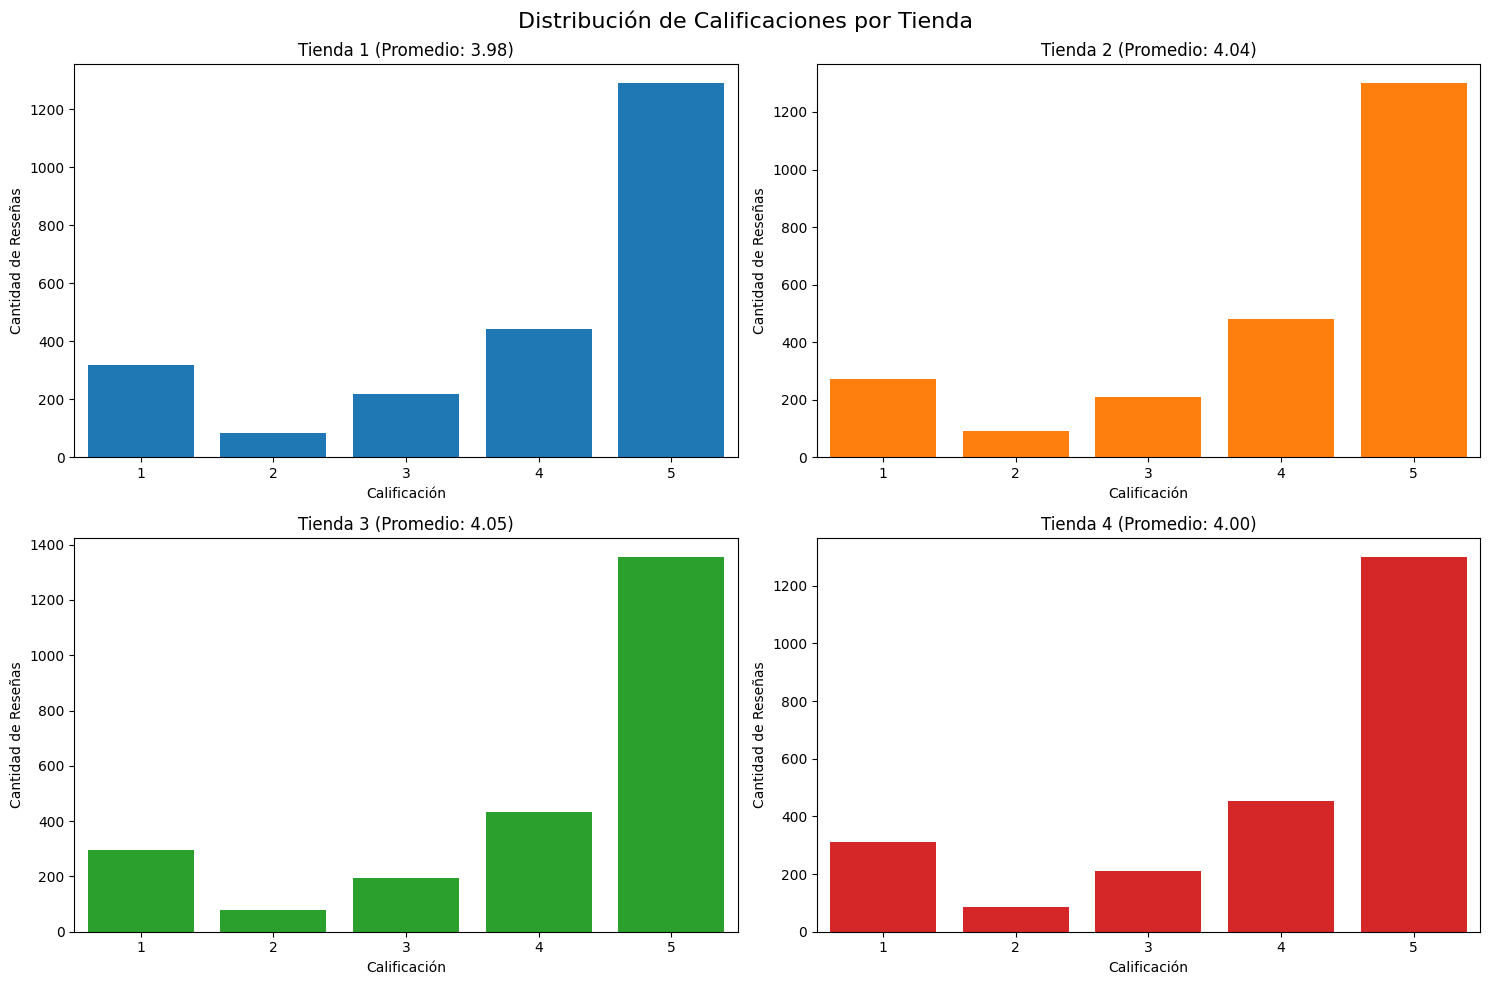


=== SATISFACCIÓN DEL CLIENTE ===
🏆 Mejor calificación: Tienda 3 (4.05)
📉 Peor calificación: Tienda 1 (3.98)


In [ ]:
# Distribución de calificaciones por tienda
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Calificaciones por Tienda', fontsize=16)

tiendas_data = [
    (tienda, 'Tienda 1', '#1f77b4'),
    (tienda2, 'Tienda 2', '#ff7f0e'),
    (tienda3, 'Tienda 3', '#2ca02c'),
    (tienda4, 'Tienda 4', '#d62728')
]

for i, (df_tienda, nombre, color) in enumerate(tiendas_data):
    row = i // 2
    col = i % 2

    calificaciones_count = df_tienda["Calificación"].value_counts().sort_index()
    axes[row, col].bar(calificaciones_count.index, calificaciones_count.values, color=color)
    axes[row, col].set_title(f'{nombre} (Promedio: {df_tienda["Calificación"].mean():.2f})')
    axes[row, col].set_xlabel('Calificación')
    axes[row, col].set_ylabel('Cantidad de Reseñas')
    axes[row, col].set_xlim(0.5, 5.5)

plt.tight_layout()
plt.show()


# Análisis de satisfacción del cliente
print("\n=== SATISFACCIÓN DEL CLIENTE ===")

# Identificar la tienda con mejor y peor calificación
mejor_tienda_idx = calificaciones_promedio["Calificación Promedio"].idxmax()
peor_tienda_idx = calificaciones_promedio["Calificación Promedio"].idxmin()

mejor_tienda = calificaciones_promedio.loc[mejor_tienda_idx, "Tienda"]
mejor_calificacion = calificaciones_promedio.loc[mejor_tienda_idx, "Calificación Promedio"]

peor_tienda = calificaciones_promedio.loc[peor_tienda_idx, "Tienda"]
peor_calificacion = calificaciones_promedio.loc[peor_tienda_idx, "Calificación Promedio"]

print(f"🏆 Mejor calificación: {mejor_tienda} ({mejor_calificacion:.2f})")
print(f"📉 Peor calificación: {peor_tienda} ({peor_calificacion:.2f})")

# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda